In [114]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import warnings
import pandas as pd

warnings.filterwarnings('ignore')


In [115]:
df = pd.read_csv("cardekho_dataset.csv", index_col=[0])
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [116]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [117]:
if "car_name" in df.columns:
    df.drop("car_name", axis=1, inplace=True)


In [118]:
if "brand" in df.columns:
    df.drop("brand", axis = 1, inplace=True)

In [119]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [120]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [121]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features: ', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == "O" ]
print("num of Categorical Feature:", len(cat_features))
discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print("Number of descrete features :", len(discrete_features))
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("NUmber of continuous_features:",len(continuous_features))

Num of Numerical Features:  7
num of Categorical Feature: 4
Number of descrete features : 2
NUmber of continuous_features: 5


In [122]:
from sklearn.model_selection import train_test_split
x = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['model']=le.fit_transform(x['model'])

In [124]:
x["model"]

0          7
1         54
2        118
3          7
4         38
        ... 
19537    117
19540     42
19541     77
19542    114
19543     25
Name: model, Length: 15411, dtype: int64

In [125]:

num_features = x.select_dtypes(exclude="object").columns
onehot_columns = ['Seller_type', 'fuel_type', 'transmission_type']


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transform = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')



In [126]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScaler", numeric_transform, num_features)
        
    ],remainder='passthrough'
)
#ColumnTransformer allows you to apply the appropriate transformation to each type of feature without having to manually separate and recombine them.

In [127]:
x=preprocessor.fit_transform(x)

In [128]:
pd.DataFrame(x)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
15406,<Compressed Sparse Row sparse matrix of dtype ...
15407,<Compressed Sparse Row sparse matrix of dtype ...
15408,<Compressed Sparse Row sparse matrix of dtype ...
15409,<Compressed Sparse Row sparse matrix of dtype ...


In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape

((11558, 133), (3853, 133))

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [131]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    mse = mean_squared_error(true, predicted)
    return mae,rmse,r2,mse

In [132]:
models = {
  
    "Adaboostclassifier" : AdaBoostClassifier(),
    
  
    

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
#training set performance
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_mse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_mse, model_test_r2= evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])

    print("model performance for training set")
    print('Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print("mean absolute error : {:.4f}".format(model_train_mae))
    print("r2_score : {:.4f}".format(model_train_r2))
    print("mean squared error: {:.4f}".format(model_train_mse))

  

    print("---------------------------------------------")

    print("model performance for testing set")
    print('Root Mean Squared Error:{:.4f}'.format(model_test_rmse))
    print("mean absolute error : {:.4f}".format(model_test_mae))
    print("r2_score : {:.4f}".format(model_test_r2))
    print("mean squared error: {:.4f}".format(model_test_mse))
 





   


Adaboostclassifier
model performance for training set
Root Mean Squared Error:776416.6712
mean absolute error : 346984.4264
r2_score : 602822847378.4392
mean squared error: 0.2526
---------------------------------------------
model performance for testing set
Root Mean Squared Error:880040.8732
mean absolute error : 382207.1438
r2_score : 774471938428.6595
mean squared error: 0.0042


In [133]:
adaboost_params = {
    "n_estimators" : [50,60,70,80,90],
    "algorithm" : ['SAMME', 'SAMME.R']
}

In [134]:
randomcv_models = [
    ("adaclass", AdaBoostClassifier(), adaboost_params)
]

In [135]:
from sklearn.model_selection import RandomizedSearchCV

adaboost_params = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(x_train,y_train)
    adaboost_params[name] = random.best_params_

for model_name in adaboost_params:
    print(f"------------------best params for(model_name)----------------")
    print(adaboost_params[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   2.9s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   2.9s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   3.0s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   3.5s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   3.5s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   3.6s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   4.0s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   4.1s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   3.7s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   4.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   4.4s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   4.2s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   4.8s
[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   4.9s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...................algorithm=SAMME, n_estimators=90; total time=   4.8s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   8.8s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   8.5s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   8.6s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=  10.6s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=  10.3s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=  10.5s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=  12.1s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=  12.6s


/Users/ameersohail/Documents/ML practice/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=  11.7s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=  13.1s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=  13.0s
[CV] END .................algorithm=SAMME.R, n_estimators=80; total time=  12.2s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=  13.5s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=  13.0s
[CV] END .................algorithm=SAMME.R, n_estimators=90; total time=  12.0s
------------------best params for(model_name)----------------
{'n_estimators': 50, 'algorithm': 'SAMME.R'}


In [136]:
models = {
    "adaboost ": AdaBoostClassifier(n_estimators =50, algorithm= 'SAMME.R')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
#training set performance
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_mse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_mse, model_test_r2= evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])

    print("model performance for training set")
    print('Root Mean Squared Error:{:.4f}'.format(model_train_rmse))
    print("mean absolute error : {:.4f}".format(model_train_mae))
    print("r2_score : {:.4f}".format(model_train_r2))
    print("mean squared error: {:.4f}".format(model_train_mse))

  

    print("---------------------------------------------")

    print("model performance for testing set")
    print('Root Mean Squared Error:{:.4f}'.format(model_test_rmse))
    print("mean absolute error : {:.4f}".format(model_test_mae))
    print("r2_score : {:.4f}".format(model_test_r2))
    print("mean squared error: {:.4f}".format(model_test_mse))
 





adaboost 
model performance for training set
Root Mean Squared Error:776416.6712
mean absolute error : 346984.4264
r2_score : 602822847378.4392
mean squared error: 0.2526
---------------------------------------------
model performance for testing set
Root Mean Squared Error:880040.8732
mean absolute error : 382207.1438
r2_score : 774471938428.6595
mean squared error: 0.0042


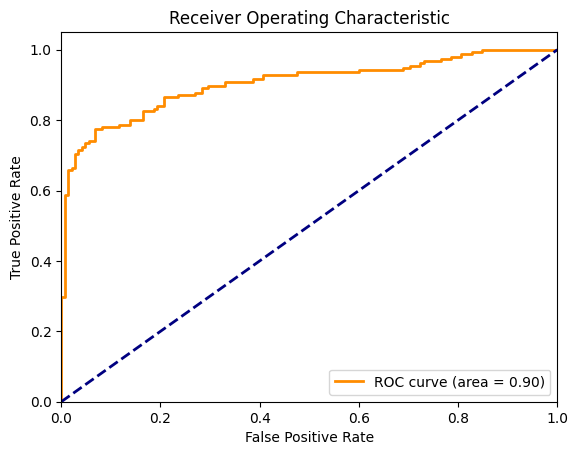

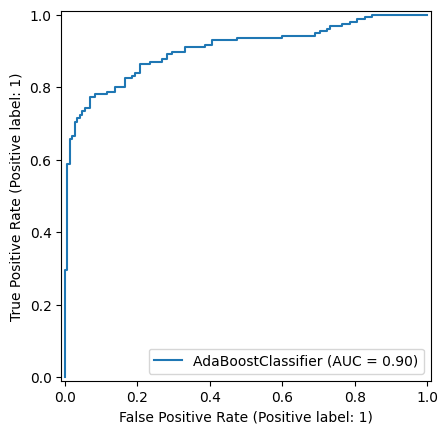

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# Step 1: Generate a synthetic dataset (or use your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Step 5: Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 6: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Alternatively, use RocCurveDisplay (available in scikit-learn >= 0.24)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


### gradient boosting for classification

In [ ]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import warnings
import pandas as pd

warnings.filterwarnings('ignore')
